# Assignment 3: Constructing a visual report with Matplotlib
You are performing an analysis of fuel efficiency in personal vehicles from model years 1970 - 1980. You have extracted the following data in `list` form:
- `all_mpgs`: Fuel economy (miles per gallon) for all selected vehicle models across all years
- `all_weights`: Weights (lbs) for all selected vehicle models across all years
- `unique_model_years`: A list of model years from 1970 to 1980
- `yearly_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles in each model year
- `yearly_mean_horsepower`: Average engine power (horsepower) for vehicles in each model year
- `origins_1970`: The origin for each vehicle from the 1970 model year
- `origins_1980`: The origin for each vehicle from the 1980 model year
- `origin_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles from each origin
- `origin_mean_horsepower`: Average engine power (horsepower) for vehicles from each origin
- `origin_mean_cylinders`: Average number of engine cylinders for vehicles from each origin
- `origin_mean_displacement`: Average cylinder volume (cm^3) for vehicles from each origin
- `origin_mean_weight`: Average weight (lbs) for vehicles from each origin
- `origin_mean_acceleration`: Average acceleration (ft/s^2) for vehicles from each origin

Your task is to create a visual report for these data. You will create a single Matplotlib Figure containing the following subplots:
1. A scatter plot with `all_weights` on the x-axis and `all_mpgs` on the y-axis
2. A line plot with `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.
3. Two pie charts, one each for the number of models by origin in `origins_1970` and `origins_1980`
4. A series of 6 bar plots with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

The subplots should use a layout with 3 rows:
- Row 1, three subplots: Scatter plot (item 1 above), 2 pie charts (item 3)
- Row 2, 1 subplot stretched across the figure: Line plot (item 2)
- Row 3, 6 subplots: 6 bar plots (item 4)

Be sure to give each subplot a title and label the axes with appropriate descriptor and units. You may customize the appearance (colors, marker types, etc.) in any way you think looks appealing
<br />
<br />
The next cell loads the data and should not be changed.

In [3]:
# Do not change this cell
import pandas as pd
import seaborn as sns

data = sns.load_dataset('mpg')

all_mpgs = data['mpg'].to_list()
all_weights = data['weight'].to_list()

unique_model_years = list(data['model_year'].unique())
unique_origins = sorted(list(data['origin'].unique()))

yearly_mean_mpgs = data.groupby('model_year').mean(numeric_only=True)['mpg'].to_list()
yearly_mean_horsepower = data.groupby('model_year').mean(numeric_only=True)['horsepower'].to_list()

origins_1970 = data.loc[data['model_year'] == 70, 'origin']
origins_1980 = data.loc[data['model_year'] == 80, 'origin']

origin_mean_mpgs = data.groupby('origin').mean(numeric_only=True)['mpg'].to_list()
origin_mean_horsepower = data.groupby('origin').mean(numeric_only=True)['horsepower'].to_list()
origin_mean_cylinders = data.groupby('origin').mean(numeric_only=True)['cylinders'].to_list()
origin_mean_displacement = data.groupby('origin').mean(numeric_only=True)['displacement'].to_list()
origin_mean_weight = data.groupby('origin').mean(numeric_only=True)['weight'].to_list()
origin_mean_acceleration = data.groupby('origin').mean(numeric_only=True)['acceleration'].to_list()


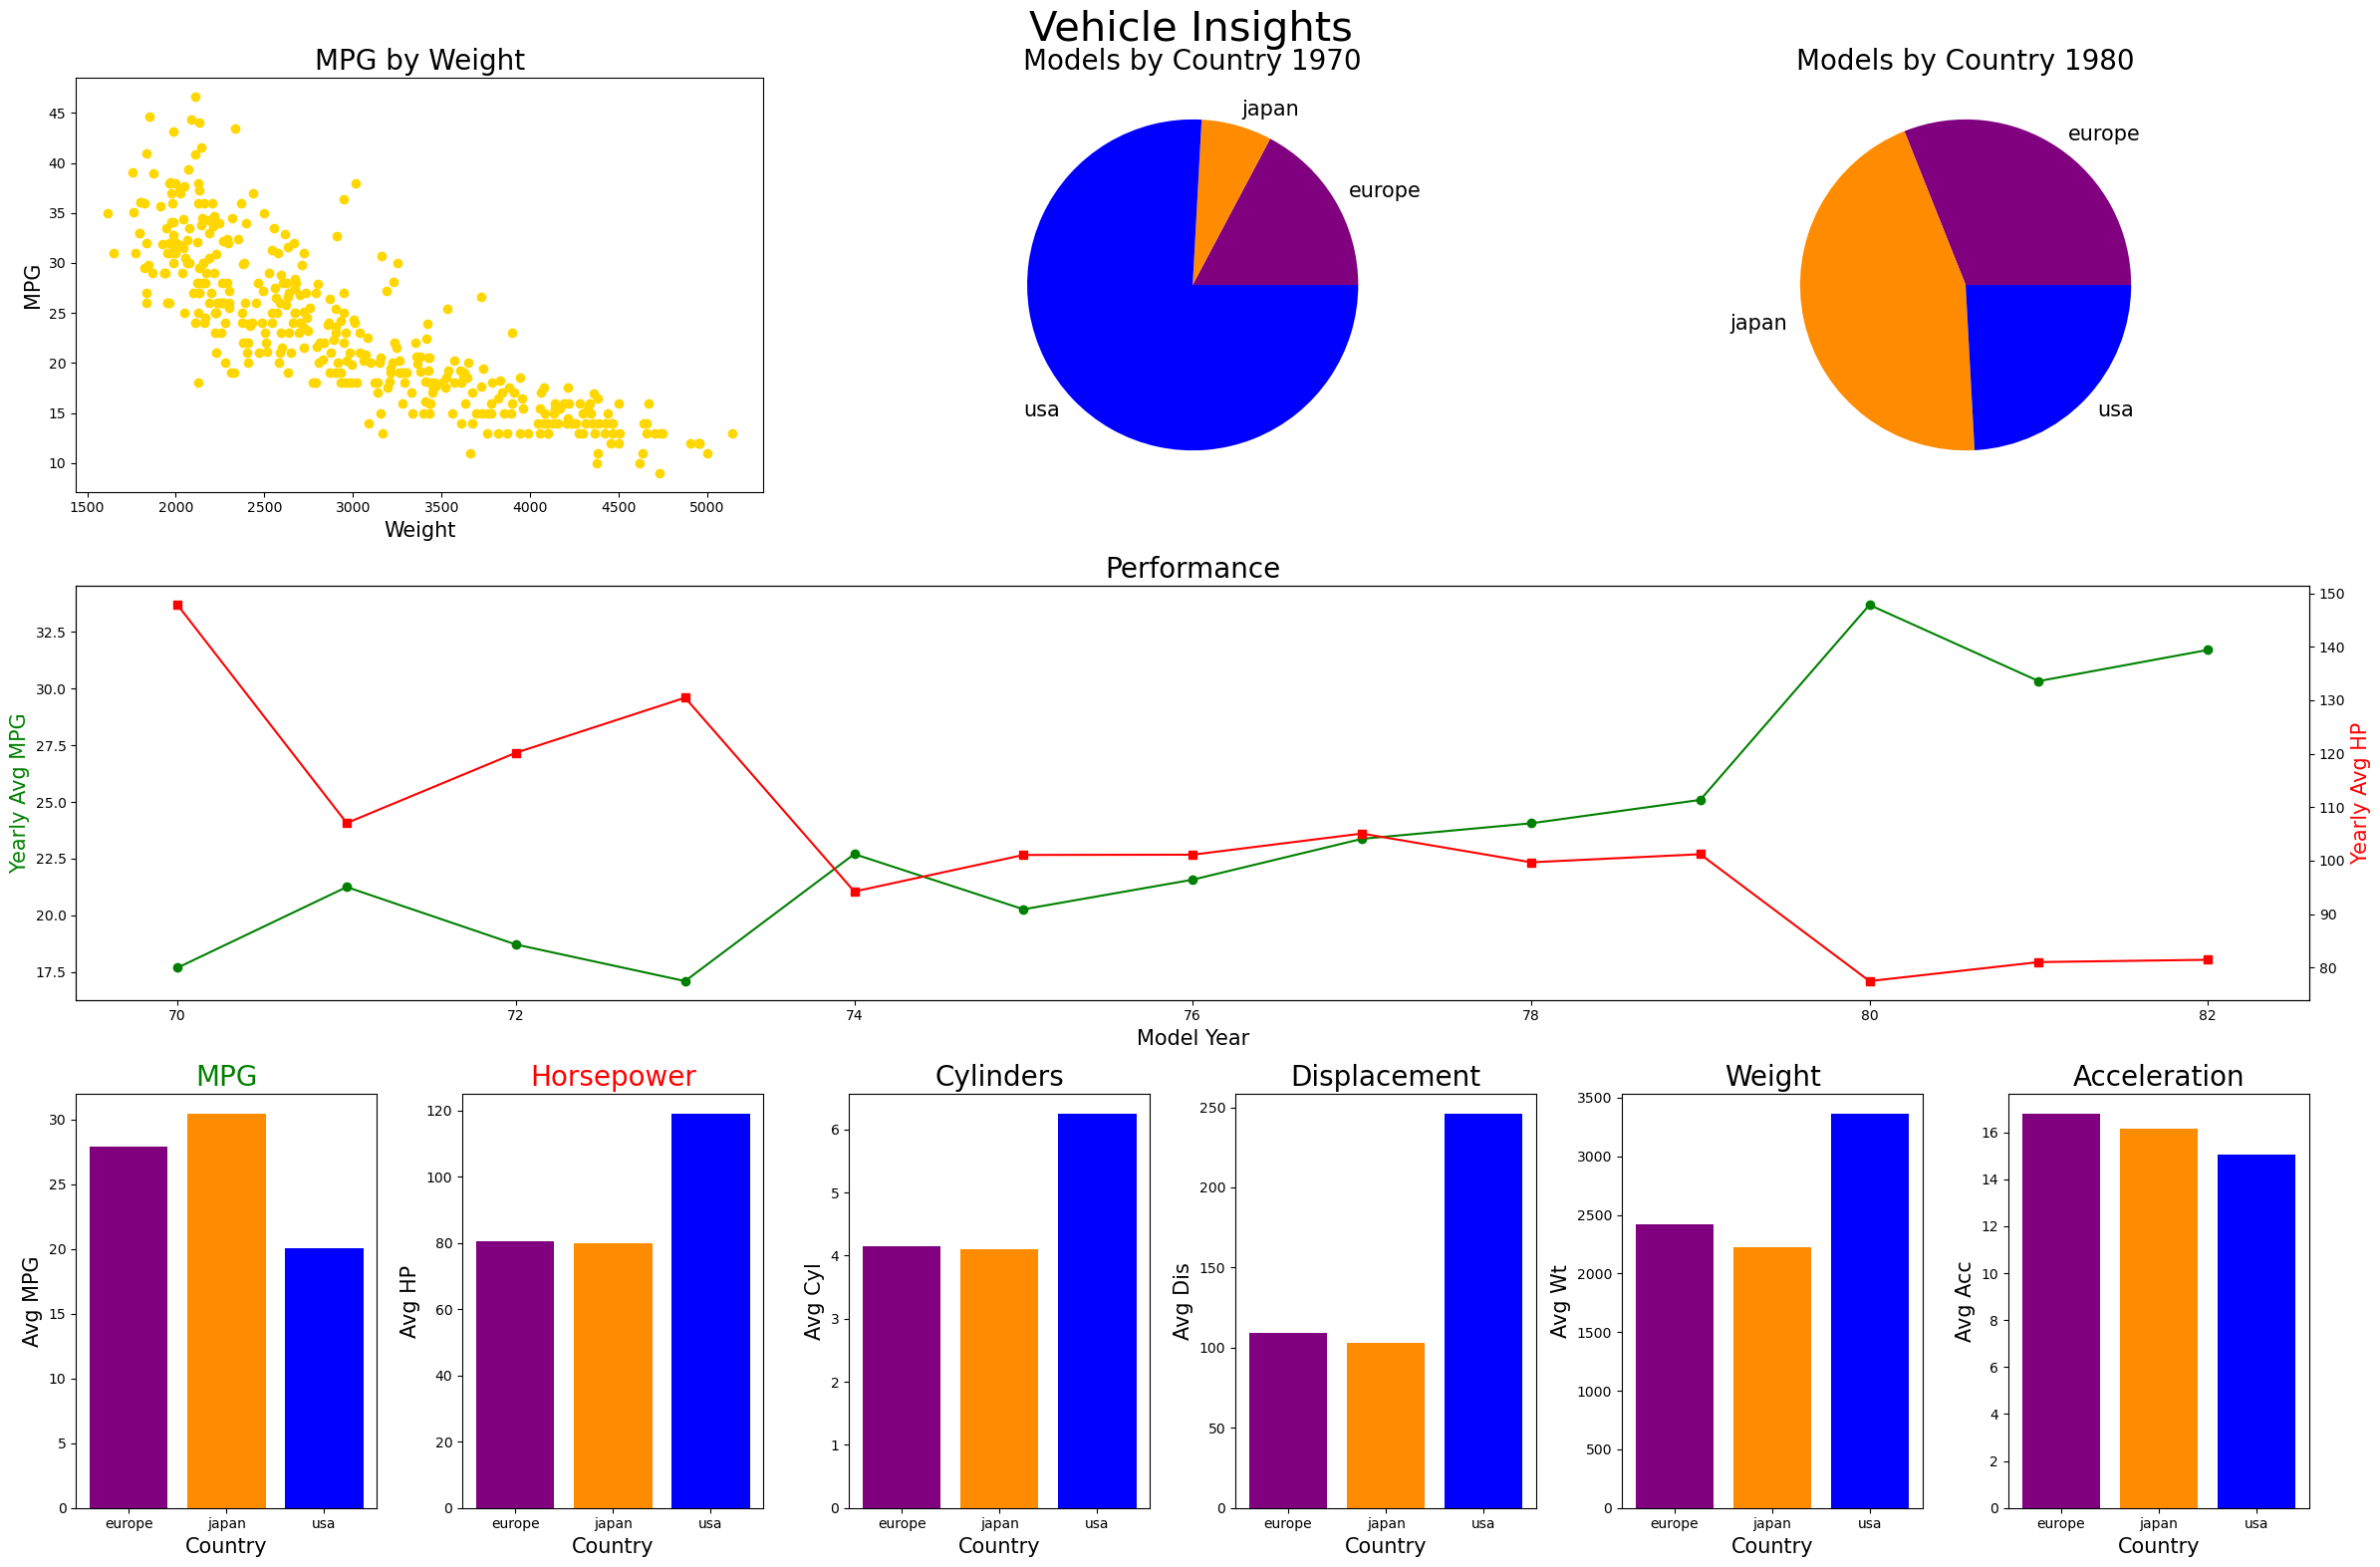

In [36]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

origin_colors= ["purple", "darkorange", "blue"]

fig = plt.figure(figsize=[24,16])
gs = GridSpec(3,6, figure = fig)

ax1 = fig.add_subplot(gs[0,:2])
ax1.set_title("MPG by Weight", fontsize= 20)
ax1.set_xlabel("Weight", fontsize= 15)
ax1.set_ylabel("MPG", fontsize= 15)

ax1.scatter(all_weights,all_mpgs, c= "gold")

ax2 = fig.add_subplot(gs[0,2:4])
ax2.set_title("Models by Country 1970", fontsize= 20)

slices = [origins_1970.to_list().count("europe"),origins_1970.to_list().count("japan"),origins_1970.to_list().count("usa")]
labels = ["europe", "japan", "usa"]
ax2.pie(slices,labels=labels, colors = origin_colors, textprops={"fontsize":15})

ax3 = fig.add_subplot(gs[0,4:])
ax3.set_title("Models by Country 1980", fontsize= 20)

slices = [origins_1980.to_list().count("europe"),origins_1980.to_list().count("japan"),origins_1980.to_list().count("usa")]
labels = ["europe", "japan", "usa"]
ax3.pie(slices,labels=labels, colors = origin_colors, textprops={'fontsize': 15})

ax4 = fig.add_subplot(gs[1,:])
ax4.set_title("Performance", fontsize= 20)
ax4.set_xlabel("Model Year", fontsize= 15)
ax4.set_ylabel("Yearly Avg MPG", color = "green", fontsize= 15)
ax4.plot(unique_model_years,yearly_mean_mpgs,marker ="o", c = "green")

ax5 = ax4.twinx()
ax5.set_ylabel("Yearly Avg HP", color = "red", fontsize= 15)
ax5.plot(unique_model_years,yearly_mean_horsepower,marker ="s", c= "red")

ax6 = fig.add_subplot(gs[2,0])
ax6.set_title("MPG", c = "green", fontsize= 20)
ax6.set_xlabel("Country", fontsize= 15)
ax6.set_ylabel("Avg MPG", fontsize= 15)
ax6.bar(unique_origins,origin_mean_mpgs, color = origin_colors)

ax7 = fig.add_subplot(gs[2,1])
ax7.set_title("Horsepower", c = "red", fontsize= 20)
ax7.set_xlabel("Country", fontsize= 15)
ax7.set_ylabel("Avg HP", fontsize= 15)
ax7.bar(unique_origins,origin_mean_horsepower, color = origin_colors)

ax8 = fig.add_subplot(gs[2,2])
ax8.set_title("Cylinders", fontsize= 20)
ax8.set_xlabel("Country", fontsize= 15)
ax8.set_ylabel("Avg Cyl", fontsize= 15)
ax8.bar(unique_origins,origin_mean_cylinders, color = origin_colors)

ax9 = fig.add_subplot(gs[2,3])
ax9.set_title("Displacement", fontsize= 20)
ax9.set_xlabel("Country", fontsize= 15)
ax9.set_ylabel("Avg Dis", fontsize= 15)
ax9.bar(unique_origins,origin_mean_displacement, color = origin_colors)

ax10 = fig.add_subplot(gs[2,4])
ax10.set_title("Weight", fontsize= 20)
ax10.set_xlabel("Country", fontsize= 15)
ax10.set_ylabel("Avg Wt", fontsize= 15)
ax10.bar(unique_origins,origin_mean_weight, color = origin_colors)

ax11 = fig.add_subplot(gs[2,5])
ax11.set_title("Acceleration", fontsize= 20)
ax11.set_xlabel("Country", fontsize= 15)
ax11.set_ylabel("Avg Acc", fontsize= 15)
ax11.bar(unique_origins,origin_mean_acceleration, color = origin_colors)

plt.suptitle("Vehicle Insights", fontsize= 30)
plt.tight_layout()
plt.show()